# Systems Design Assignment 2

## The following Jupyter Notebook contains code pertaining to the Pre-Processing and Clustering Steps

In [215]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn as skl
import pandas as pd

## The csv file is read into a pandas dataframe df

In [216]:
df = pd.read_csv('C:/Users/Venkata Saketh Ch/Desktop/Systems Design/Project 2/Chronic_Kidney_Disease/ckd_full.csv')

# Pre-processing

### The shape of the data before the Pre-processing stage

In [217]:
df.shape

(400, 26)

## Editing the column names

In [218]:
df.columns = ['id','age', 'bp', 'sg', 'al' , 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv',\
              'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe','ane', 'class']

## Removing the irrelavent attributes

In [219]:
df.drop("id",axis=1,inplace=True) 

## Handling the Missing Data

In [220]:
df.replace('?', np.nan, inplace=True)
df.dropna(axis=0, inplace=True)
df.reset_index(drop = True, inplace = True)

## Dealing with categorical data through Label Encoding

In [221]:
dictonary = {"rbc": {"abnormal":1,"normal": 0,},"pc":{"abnormal":1,"normal": 0,},"pcc":{"present":1,"notpresent":0,},\
             "ba":{"notpresent":0,"present": 1,},"htn":{"yes":1,"no": 0,},"dm":{"yes":1,"no":0,},"cad":{"yes":1,"no": 0,},\
             "appet":{"good":1,"poor": 0,},"pe":{"yes":1,"no":0,},"ane":{"yes":1,"no":0,}}

In [222]:
df=df.replace(dictonary)

### Converting the Numerical attributes and other label-encoded categorical attributes to the float datatype

In [223]:
df[['age', 'bp','sg', 'al', 'su']] = df[['age', 'bp','sg', 'al', 'su']].astype(float)
df[['bgr','bu','sc', 'sod', 'pot']] = df[['bgr','bu','sc', 'sod', 'pot']].astype(float)
df[['hemo', 'pcv', 'wc','rc']] = df[['hemo', 'pcv', 'wc','rc']].astype(float)    

## The shape of the data after the Pre-processing stage

In [224]:
df.shape

(158, 25)

## Saving the dataframe as a csv file after the Pre-processing stage

In [225]:
df.to_csv('Assignment_2.csv')

# Clustering

## Converting the class attribute from categorical to numeric values

In [226]:
# we convert the categorical values of the class attribute ckd and notckd to 1 and 0 respectively
df['class']=[1 if each=="ckd" else 0 for each in df['class']]

In [228]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48.0,70.0,1.005,4.0,0.0,0,1,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,0,1,1,1
1,53.0,90.0,1.020,2.0,0.0,1,1,1,0,70.0,...,29.0,12100.0,3.7,1,1,0,0,0,1,1
2,63.0,70.0,1.010,3.0,0.0,1,1,1,0,380.0,...,32.0,4500.0,3.8,1,1,0,0,1,0,1
3,68.0,80.0,1.010,3.0,2.0,0,1,1,1,157.0,...,16.0,11000.0,2.6,1,1,1,0,1,0,1
4,61.0,80.0,1.015,2.0,0.0,1,1,0,0,173.0,...,24.0,9200.0,3.2,1,1,1,0,1,1,1


## Creating the dataframe for Clustering

### We create the dataframe df_cls for clustering. It contains all the continuous attributes given in the dataset.

In [229]:
df_cls = df.filter(['age','bp','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc'], axis=1)

## Normalizing the data

In [230]:
def normalize(df, toNormalize): 
    result = df.copy()
    for item in df.columns:
        if (item in toNormalize):
            max_value = df[item].max()
            min_value = df[item].min()
            result[item] = (df[item] - min_value) / (max_value - min_value)
    return result

In [231]:
toNormalize = ['age','bp','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc'] 
X_norm = normalize(df_cls, toNormalize)
X_norm = X_norm.dropna()

## K-Means Clustering with number of clusters k = 2

In [232]:
# Performing K-Means Clustering using number of clusters K=2
from sklearn.cluster import KMeans

km_2 = KMeans(n_clusters=2, init='random', n_init=100, max_iter=100)
y_km_2 = km_2.fit_predict(X_norm)

## Cluster Centroids

In [233]:
print(km_2.cluster_centers_)  

[[0.67765568 0.50854701 0.30921856 0.33118943 0.38167013 0.50098619
  0.06972054 0.43362986 0.43589744 0.29509871 0.23772273]
 [0.52908436 0.36554622 0.09257703 0.0805205  0.03537361 0.78388278
  0.04090265 0.81415423 0.82838469 0.17799509 0.55034895]]


In [234]:
labels = km_2.predict(X_norm)
clusters = {}
n = 0
pat_obs = list(range(1,159))
for item in labels:
        if item in clusters:
            clusters[item].append(pat_obs[n])
        else:
            clusters[item] = [pat_obs[n]]
        n +=1

In [235]:
for item in clusters:
    print("\n")
    print ("Cluster ", item )
    for i in clusters[item]:
        print (i, end = " ")



Cluster  0
1 2 3 4 5 6 7 8 9 10 11 12 13 14 16 17 18 19 20 22 23 24 26 27 28 29 30 32 33 34 35 36 37 38 39 40 41 42 43 

Cluster  1
15 21 25 31 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 

In [236]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = X_norm.index.values
cluster_map['cluster'] = km_2.labels_

In [237]:
df_cluster_contents = pd.DataFrame(columns=['Not ckd','ckd'])
for j in range(0,2):
    df_temp = cluster_map[cluster_map.cluster == j]
    count_zero = 0
    count_one = 0
    for i in df_temp.index.values:
        x = df.loc[cluster_map.loc[i,'data_index'],'class']
        if x == 0 :
            count_zero = count_zero + 1
        else:
            count_one = count_one + 1
    df_data = pd.DataFrame(data=[(count_zero, count_one)], columns=['Not ckd','ckd'])
    df_cluster_contents = df_cluster_contents.append(df_data, ignore_index = True)

In [238]:
print (df_cluster_contents)

  Not ckd ckd
0       0  39
1     115   4


## Elbow Method to determine Optimal K

In [239]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    y_km = km.fit_predict(X_norm)
    Sum_of_squared_distances.append(km.inertia_)

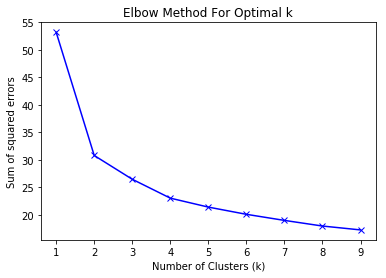

In [240]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of squared errors')
plt.title('Elbow Method For Optimal k')
plt.show()

## K-Means Clustering with k = 4

In [241]:
# Performing K-Means Clustering using number of clusters K=4
from sklearn.cluster import KMeans

km_4 = KMeans(n_clusters=4, init='random', n_init=100, max_iter=100)
y_km_4 = km_4.fit_predict(X_norm)

## Cluster centroids

In [242]:
print(km_4.cluster_centers_)  

[[0.72051948 0.46       0.35780952 0.20548495 0.20216216 0.53538462
  0.04116854 0.47346939 0.47555556 0.33221239 0.26983051]
 [0.60111317 0.5952381  0.22244898 0.55566173 0.70222008 0.43956044
  0.12070626 0.36248785 0.36507937 0.22882427 0.18038741]
 [0.70312144 0.38596491 0.10785297 0.08149974 0.040422   0.80611786
  0.03804455 0.81083662 0.82768031 0.18879056 0.53880464]
 [0.36908253 0.34677419 0.07853303 0.07962024 0.03073235 0.76344086
  0.04353026 0.8172043  0.82903226 0.16807023 0.56096227]]


In [243]:
labels = km_4.predict(X_norm)
clusters = {}
n = 0
pat_obs = list(range(1,159))
for item in labels:
        if item in clusters:
            clusters[item].append(pat_obs[n])
        else:
            clusters[item] = [pat_obs[n]]
        n +=1

In [244]:
for item in clusters:
    print("\n")
    print ("Cluster ", item )
    for i in clusters[item]:
        print (i, end = " ")



Cluster  0
1 3 4 5 7 8 9 10 14 16 17 18 22 23 26 27 28 29 30 33 36 37 38 40 42 

Cluster  1
2 6 11 12 13 19 20 24 32 34 35 39 41 43 

Cluster  2
15 21 25 46 47 48 50 55 56 59 60 61 65 66 70 73 74 76 80 84 85 88 89 91 92 93 94 96 100 102 104 107 110 120 122 126 127 128 130 131 133 134 135 136 137 138 139 140 142 143 144 147 149 151 153 154 158 

Cluster  3
31 44 45 49 51 52 53 54 57 58 62 63 64 67 68 69 71 72 75 77 78 79 81 82 83 86 87 90 95 97 98 99 101 103 105 106 108 109 111 112 113 114 115 116 117 118 119 121 123 124 125 129 132 141 145 146 148 150 152 155 156 157 

In [245]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = X_norm.index.values
cluster_map['cluster'] = km_4.labels_

In [246]:
df_cluster_contents = pd.DataFrame(columns=['Not ckd','ckd'])
for j in range(0,4):
    df_temp = cluster_map[cluster_map.cluster == j]
    count_zero = 0
    count_one = 0
    for i in df_temp.index.values:
        x = df.loc[cluster_map.loc[i,'data_index'],'class']
        if x == 0 :
            count_zero = count_zero + 1
        else:
            count_one = count_one + 1
    df_data = pd.DataFrame(data=[(count_zero, count_one)], columns=['Not ckd','ckd'])
    df_cluster_contents = df_cluster_contents.append(df_data, ignore_index = True)

In [247]:
print (df_cluster_contents)

  Not ckd ckd
0       0  25
1       0  14
2      54   3
3      61   1


## K-Means Clustering with k = 5

In [248]:
# Performing K-Means Clustering using number of clusters K=5
from sklearn.cluster import KMeans

km_5 = KMeans(n_clusters=5, init='random', n_init=100, max_iter=100)
y_km_5 = km_5.fit_predict(X_norm)

In [250]:
print(km_5.cluster_centers_)  

[[0.66666667 0.46296296 0.16746032 0.27220364 0.30668168 0.45014245
  0.04257179 0.43386243 0.4382716  0.38028515 0.25047081]
 [0.36908253 0.34677419 0.07853303 0.07962024 0.03073235 0.76344086
  0.04353026 0.8172043  0.82903226 0.16807023 0.56096227]
 [0.5974026  0.66666667 0.26190476 0.62021553 0.79129129 0.47863248
  0.16729089 0.3159486  0.29135802 0.21681416 0.13370998]
 [0.70312144 0.38596491 0.10785297 0.08149974 0.040422   0.80611786
  0.03804455 0.81083662 0.82768031 0.18879056 0.53880464]
 [0.754329   0.45833333 0.55734127 0.20289855 0.18693694 0.59401709
  0.03726592 0.52154195 0.54074074 0.22603245 0.29661017]]


In [251]:
labels = km_5.predict(X_norm)
clusters = {}
n = 0
pat_obs = list(range(1,159))
for item in labels:
        if item in clusters:
            clusters[item].append(pat_obs[n])
        else:
            clusters[item] = [pat_obs[n]]
        n +=1

In [252]:
for item in clusters:
    print("\n")
    print ("Cluster ", item )
    for i in clusters[item]:
        print (i, end = " ")



Cluster  0
1 2 4 5 6 8 10 11 12 18 22 27 28 29 33 38 39 40 

Cluster  4
3 7 9 14 16 17 23 26 30 36 37 42 

Cluster  2
13 19 20 24 32 34 35 41 43 

Cluster  3
15 21 25 46 47 48 50 55 56 59 60 61 65 66 70 73 74 76 80 84 85 88 89 91 92 93 94 96 100 102 104 107 110 120 122 126 127 128 130 131 133 134 135 136 137 138 139 140 142 143 144 147 149 151 153 154 158 

Cluster  1
31 44 45 49 51 52 53 54 57 58 62 63 64 67 68 69 71 72 75 77 78 79 81 82 83 86 87 90 95 97 98 99 101 103 105 106 108 109 111 112 113 114 115 116 117 118 119 121 123 124 125 129 132 141 145 146 148 150 152 155 156 157 

In [253]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = X_norm.index.values
cluster_map['cluster'] = km_5.labels_

In [254]:
df_cluster_contents = pd.DataFrame(columns=['Not ckd','ckd'])
for j in range(0,5):
    df_temp = cluster_map[cluster_map.cluster == j]
    count_zero = 0
    count_one = 0
    for i in df_temp.index.values:
        x = df.loc[cluster_map.loc[i,'data_index'],'class']
        if x == 0 :
            count_zero = count_zero + 1
        else:
            count_one = count_one + 1
    df_data = pd.DataFrame(data=[(count_zero, count_one)], columns=['Not ckd','ckd'])
    df_cluster_contents = df_cluster_contents.append(df_data, ignore_index = True)

In [255]:
print (df_cluster_contents)

  Not ckd ckd
0       0  18
1      61   1
2       0   9
3      54   3
4       0  12


## K-Means Clustering with k = 3

In [256]:
# Performing K-Means Clustering using number of clusters K=3
from sklearn.cluster import KMeans

km_3 = KMeans(n_clusters=3, init='random', n_init=100, max_iter=100)
y_km_3 = km_3.fit_predict(X_norm)

In [257]:
print(km_3.cluster_centers_)  

[[0.52908436 0.36554622 0.09257703 0.0805205  0.03537361 0.78388278
  0.04090265 0.81415423 0.82838469 0.17799509 0.55034895]
 [0.72051948 0.46       0.35780952 0.20548495 0.20216216 0.53538462
  0.04116854 0.47346939 0.47555556 0.33221239 0.26983051]
 [0.60111317 0.5952381  0.22244898 0.55566173 0.70222008 0.43956044
  0.12070626 0.36248785 0.36507937 0.22882427 0.18038741]]


In [258]:
labels = km_3.predict(X_norm)
clusters = {}
n = 0
pat_obs = list(range(1,159))
for item in labels:
        if item in clusters:
            clusters[item].append(pat_obs[n])
        else:
            clusters[item] = [pat_obs[n]]
        n +=1

In [259]:
for item in clusters:
    print("\n")
    print ("Cluster ", item )
    for i in clusters[item]:
        print (i, end = " ")



Cluster  1
1 3 4 5 7 8 9 10 14 16 17 18 22 23 26 27 28 29 30 33 36 37 38 40 42 

Cluster  2
2 6 11 12 13 19 20 24 32 34 35 39 41 43 

Cluster  0
15 21 25 31 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 

In [260]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = X_norm.index.values
cluster_map['cluster'] = km_3.labels_

In [261]:
df_cluster_contents = pd.DataFrame(columns=['Not ckd','ckd'])
for j in range(0,3):
    df_temp = cluster_map[cluster_map.cluster == j]
    count_zero = 0
    count_one = 0
    for i in df_temp.index.values:
        x = df.loc[cluster_map.loc[i,'data_index'],'class']
        if x == 0 :
            count_zero = count_zero + 1
        else:
            count_one = count_one + 1
    df_data = pd.DataFrame(data=[(count_zero, count_one)], columns=['Not ckd','ckd'])
    df_cluster_contents = df_cluster_contents.append(df_data, ignore_index = True)

In [262]:
print (df_cluster_contents)

  Not ckd ckd
0     115   4
1       0  25
2       0  14
